In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv('data/mobile_game_inapp_purchases.csv')

In [3]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05


In [4]:
df.isna().sum()

UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

In [5]:
# Numerical Imputation
df['Age'].fillna(df['Age'].median(), inplace=True)
df['InAppPurchaseAmount'].fillna(df['InAppPurchaseAmount'].median(), inplace=True)
df['FirstPurchaseDaysAfterInstall'].fillna(df['FirstPurchaseDaysAfterInstall'].median(), inplace=True)

# Categorical Imputation
categorical_cols_with_na = ['Gender', 'Country', 'Device', 'GameGenre', 'PaymentMethod', 'LastPurchaseDate']
for col in categorical_cols_with_na:
    df[col].fillna('Unknown', inplace=True)


In [6]:
df.isna().sum()

UserID                           0
Age                              0
Gender                           0
Country                          0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
SpendingSegment                  0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
LastPurchaseDate                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            3024 non-null   float64
 2   Gender                         3024 non-null   object 
 3   Country                        3024 non-null   object 
 4   Device                         3024 non-null   object 
 5   GameGenre                      3024 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            3024 non-null   float64
 10  FirstPurchaseDaysAfterInstall  3024 non-null   float64
 11  PaymentMethod                  3024 non-null   object 
 12  LastPurchaseDate               3024 non-null   o

In [8]:
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')
df['Age'] = df['Age'].astype('int64')
df['SessionCount'] = df['SessionCount'].astype('int64')
df['FirstPurchaseDaysAfterInstall'] = df['FirstPurchaseDaysAfterInstall'].astype('int64')

In [9]:
df['LastPurchaseYear'] = df['LastPurchaseDate'].dt.year
df['LastPurchaseMonth'] = df['LastPurchaseDate'].dt.month
df['LastPurchaseDayOfWeek'] = df['LastPurchaseDate'].dt.dayofweek
df['LastPurchaseYear'].fillna(df['LastPurchaseYear'].median(), inplace=True)
df['LastPurchaseMonth'].fillna(df['LastPurchaseMonth'].median(), inplace=True)
df['LastPurchaseDayOfWeek'].fillna(df['LastPurchaseDayOfWeek'].median(), inplace=True)
df['LastPurchaseYear'] = df['LastPurchaseYear'].astype('int64')
df['LastPurchaseMonth'] = df['LastPurchaseMonth'].astype('int64')
df['LastPurchaseDayOfWeek'] = df['LastPurchaseDayOfWeek'].astype('int64')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         3024 non-null   object        
 1   Age                            3024 non-null   int64         
 2   Gender                         3024 non-null   object        
 3   Country                        3024 non-null   object        
 4   Device                         3024 non-null   object        
 5   GameGenre                      3024 non-null   object        
 6   SessionCount                   3024 non-null   int64         
 7   AverageSessionLength           3024 non-null   float64       
 8   SpendingSegment                3024 non-null   object        
 9   InAppPurchaseAmount            3024 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  3024 non-null   int64         
 11  PaymentMethod    

In [11]:
df_model = df.drop(columns=['UserID', 'LastPurchaseDate'])

In [12]:
df_model.head()

,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseYear,LastPurchaseMonth,LastPurchaseDayOfWeek
0,49,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28,Apple Pay,2025,3,2
1,15,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18,Debit Card,2025,6,6
2,23,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30,Apple Pay,2025,6,0
3,31,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9,Debit Card,2025,4,1
4,37,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15,Paypal,2025,5,0


In [13]:
categorical_features = df_model.select_dtypes(include="object").columns
numerical_features = df_model.select_dtypes(exclude="object").columns

print("Categorical Features identified:", list(categorical_features))
print("Numerical Features identified:", list(numerical_features))

Categorical Features identified: ['Gender', 'Country', 'Device', 'GameGenre', 'SpendingSegment', 'PaymentMethod']
Numerical Features identified: ['Age', 'SessionCount', 'AverageSessionLength', 'InAppPurchaseAmount', 'FirstPurchaseDaysAfterInstall', 'LastPurchaseYear', 'LastPurchaseMonth', 'LastPurchaseDayOfWeek']


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

processed_data = preprocessor.fit_transform(df_model)

print("Shape of processed data:", processed_data.shape)

Shape of processed data: (3024, 70)


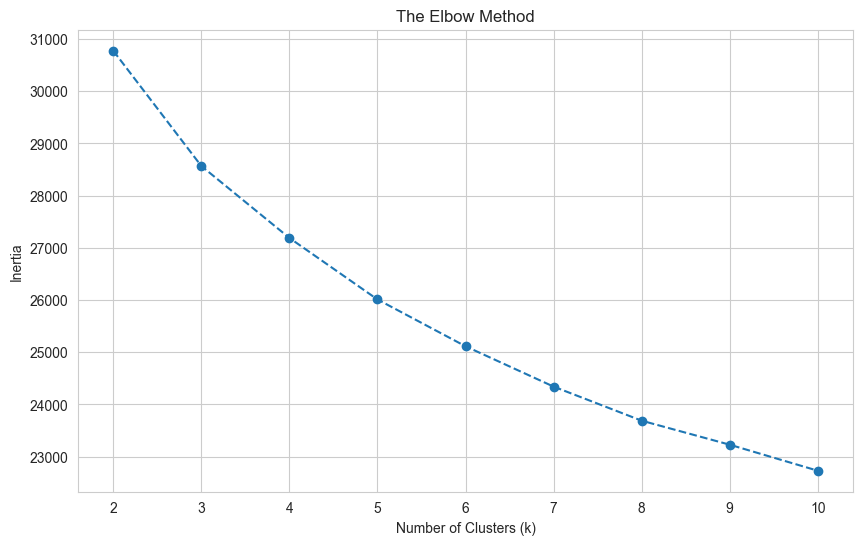

In [15]:
# range of cluster numbers from 2 to 10
k_range = range(2, 11)
inertia_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(processed_data)
    inertia_scores.append(kmeans.inertia_)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()